In [8]:
import pip
pip.main(['install', 'xgboost'])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


0

In [10]:
import xgboost
print(xgboost.__version__)

1.3.3


In [28]:
# Import packages
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Load and preprocess data

In [11]:
# Load datasets
df = pd.read_excel('Dokumenter\ChildrenWristFeaturesV2_TSF_new.xlsx')
df.fillna(df.mean(), inplace=True)

In [43]:
# Initialize features and targets/labels
X = df.iloc[:, 1:32]
Y = df.iloc[:, 32]

# Encode labels from 0, 1, 2... etc.
labelencoder = LabelEncoder()
Y = labelencoder.fit_transform(Y)

# Splits datasets into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Data preprocessing, scaling datasets/standardization
scal_data = StandardScaler()
X_train = scal_data.fit_transform(X_train)
X_test = scal_data.transform(X_test)

# Hyperparameter tuning

In [44]:
# Try different range of values
# Number of boosting rounds
n_estimators = range(1, 10, 2)
# Encode the labels
#use_label_encoder = ['false']
# Maximum tree depth
max_depth = range(1, 10, 2)
# Boosting learning rate
learning_rate  = [0.0001, 0.001, 0.01, 0.1, 1.0]
# Which booster to use
booster = ['gbtree', 'gblinear', 'dart']

# Create dictionary to store the hyperparameters
param_grid = { 'n_estimators': n_estimators,
               'max_depth': max_depth,
               'learning_rate': learning_rate,
               'booster': booster}

# Base model
xgb = XGBClassifier(use_label_encoder='false')

# First run

In [45]:
# Use the GridSearchCV function to cross validate and find the best values for each hyperparameter
xgb_grid = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=2)
xgb_grid.fit(X_train, y_train)
print(xgb_grid.best_params_)
print(xgb_grid.best_score_)

Fitting 5 folds for each of 375 candidates, totalling 1875 fits
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Anaconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[01:10:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1, total=   0.9s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[01:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1, total=   0.8s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1 
[01:10:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1, total=   0.8s
[CV] booster=gbtree, learning_rate=0.0001, max_depth=1, n_estimators=1 
[01:10:56] WARNING: C:/Users/Administrator/workspace/xgboost

[Parallel(n_jobs=1)]: Done 1875 out of 1875 | elapsed: 308.7min finished


[06:19:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'booster': 'gbtree', 'learning_rate': 1.0, 'max_depth': 9, 'n_estimators': 9}
0.7774647353295331


# Second run

# Features analyzing

# First run

Feature: 0, Score: 0.06570
Feature: 1, Score: 0.02496
Feature: 2, Score: 0.02168
Feature: 3, Score: 0.02997
Feature: 4, Score: 0.04017
Feature: 5, Score: 0.01300
Feature: 6, Score: 0.01683
Feature: 7, Score: 0.01910
Feature: 8, Score: 0.04343
Feature: 9, Score: 0.03746
Feature: 10, Score: 0.02768
Feature: 11, Score: 0.03349
Feature: 12, Score: 0.03185
Feature: 13, Score: 0.04830
Feature: 14, Score: 0.07079
Feature: 15, Score: 0.05095
Feature: 16, Score: 0.01894
Feature: 17, Score: 0.03943
Feature: 18, Score: 0.02266
Feature: 19, Score: 0.01374
Feature: 20, Score: 0.00000
Feature: 21, Score: 0.00000
Feature: 22, Score: 0.05227
Feature: 23, Score: 0.03174
Feature: 24, Score: 0.03941
Feature: 25, Score: 0.04625
Feature: 26, Score: 0.04529
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.04316
Feature: 29, Score: 0.02678
Feature: 30, Score: 0.04498


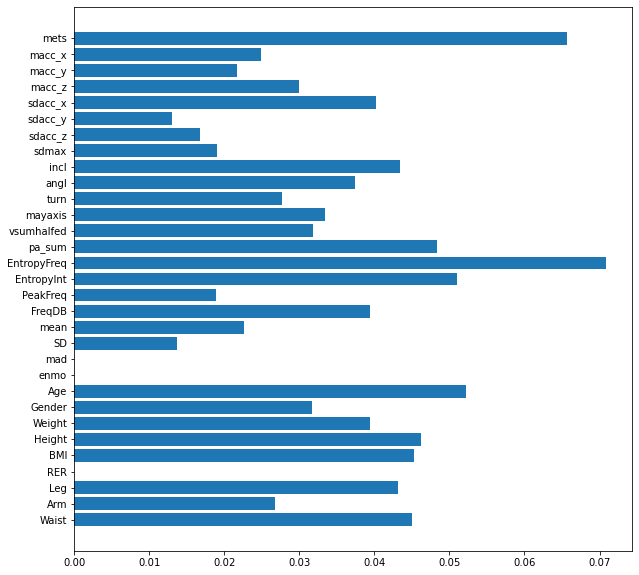

In [46]:
# Analyze features using feature importance
importance = xgb_grid.best_estimator_.feature_importances_
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# Plot feature importance chart
plt.figure(figsize=(10, 10))
plt.barh(range(31, 0, -1), xgb_grid.best_estimator_.feature_importances_[0:31])
plt.yticks(range(31, 0, -1), df.columns.tolist()[1:32])
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)

# New run with data from features

In [48]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
df_features = df.iloc[:, 1:32]
X_new = df_features.iloc[:, importance>=0.03]
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(X_new, Y, test_size=0.2, random_state=42)
xgb_new = XGBClassifier(use_label_encoder='false', booster='gbtree', learning_rate=1.0, max_depth=9, n_estimators=9)

#xgb_clf = OneVsRestClassifier(xgb_new)

xgb_new.fit(X_train_new, y_train_new)
pred_train = xgb_new.predict(X_train_new)
pred_test = xgb_new.predict(X_test_new)
print(xgb_new.score(X_train_new, y_train_new))
print(xgb_new.score(X_test_new, y_test_new))

auc_tr = roc_auc_score(y_train_new, xgb_new.predict_proba(X_train_new), average='macro', multi_class='ovr')
auc_ts = roc_auc_score(y_test_new, xgb_new.predict_proba(X_test_new), average='macro', multi_class='ovr')

print(auc_tr)
print(auc_ts)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_new, pred_test))

[06:41:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8894915936408042
0.7952508140938861
0.9941821731890476
0.9815450602321453
[[ 1379    23     4     0     0     0     0     0     0    23   221]
 [   19  1371    28     0     0     0     0     0     0     3   224]
 [    6    26  1351     0     0     3     1     0     3     4   270]
 [    0     0     0  1227    96     4     6     6     1     0   338]
 [    0     0     0    72  1281    49    22     3    10     0   214]
 [    0     1     4    14    46  1314    57    11    21     0   220]
 [    0     0     0    12    34    36  1110    16   147     0   324]
 [    0     0     0     8     4    11    12  1305     4     0   332]
 [    0     0     1     3    10    38   113     0   695     0

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_train_new, pred_train))
print(classification_report(y_test_new, pred_test))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6750
           1       0.93      0.91      0.92      6755
           2       0.93      0.92      0.92      6736
           3       0.84      0.85      0.85      6722
           4       0.85      0.88      0.86      6749
           5       0.90      0.90      0.90      6712
           6       0.84      0.81      0.82      6721
           7       0.86      0.88      0.87      6724
           8       0.83      0.83      0.83      4213
           9       0.96      0.94      0.95      3042
          10       0.89      0.90      0.90     48198

    accuracy                           0.89    109322
   macro avg       0.89      0.89      0.89    109322
weighted avg       0.89      0.89      0.89    109322

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1650
           1       0.86      0.83      0.85      1645
           2       0.85 